<a href="https://colab.research.google.com/github/arunchacko1989/Second-hand-car-price-prediction/blob/main/Copy_of_M6_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [40]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

replace FullIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace FullIJCNN2013/00001.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Import Required packages

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [42]:
data = []
labels = []

classes = 43
cur_path = os.getcwd()

distribution_of_classes = dict()


In [43]:
cur_path

'/content'

In [44]:
# YOUR CODE HERE
for i in range(classes):
  if i < 10:
    path = os.path.join(f"FullIJCNN2013/0{str(i)}")
    #print(path)
    images = os.listdir(path)
    class_num = "0"+str(i)
  else:
    path = os.path.join('FullIJCNN2013/',str(i))
    #print(path)
    images = os.listdir(path)
    class_num = str(i)
  for a in images:
    #print(a)
    try:
      image = Image.open(path + '//'+ a).convert("RGB")
      #num_images = len(image)
      #distribution_of_classes[class_num] = num_images
      #print(image)
      image = image.resize((30,30))
      image = np.array(image)
      img_array = image.flatten()
      #print(image)
      data.append(img_array)
      labels.append(i)
    except Exception as e:
      print(e)



In [45]:
import os

for i in range(classes):

  if i < 10:
    path = os.path.join(f"FullIJCNN2013/0{str(i)}")
    # List all files in the directory
    files = os.listdir(path)
    # Filter the list to include only image files (e.g., with extensions .jpg, .png, .jpeg, etc.)
    image_extensions = {'.ppm'}
    image_files = [f for f in files if os.path.splitext(f)[1].lower() in image_extensions]

    # Count the images
    num_images = len(image_files)
    distribution_of_classes["0" + str(i)] = num_images

    print(f"Number of images in the folder: {num_images}")
  else:
    path = os.path.join('FullIJCNN2013/',str(i))
    # List all files in the directory
    files = os.listdir(path)
    image_extensions = {'.ppm'}
    image_files = [f for f in files if os.path.splitext(f)[1].lower() in image_extensions]

    # Count the images
    num_images = len(image_files)
    distribution_of_classes[str(i)] = num_images







Number of images in the folder: 4
Number of images in the folder: 79
Number of images in the folder: 81
Number of images in the folder: 30
Number of images in the folder: 68
Number of images in the folder: 53
Number of images in the folder: 19
Number of images in the folder: 41
Number of images in the folder: 57
Number of images in the folder: 41


In [46]:
distribution_of_classes

{'00': 4,
 '01': 79,
 '02': 81,
 '03': 30,
 '04': 68,
 '05': 53,
 '06': 19,
 '07': 41,
 '08': 57,
 '09': 41,
 '10': 80,
 '11': 38,
 '12': 85,
 '13': 83,
 '14': 32,
 '15': 15,
 '16': 8,
 '17': 29,
 '18': 38,
 '19': 2,
 '20': 9,
 '21': 5,
 '22': 13,
 '23': 20,
 '24': 5,
 '25': 31,
 '26': 18,
 '27': 3,
 '28': 14,
 '29': 5,
 '30': 16,
 '31': 2,
 '32': 8,
 '33': 16,
 '34': 12,
 '35': 20,
 '36': 9,
 '37': 2,
 '38': 88,
 '39': 6,
 '40': 10,
 '41': 7,
 '42': 11}

In [47]:
data = np.array(data)
labels = np.array(labels)

In [48]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [49]:
data.shape, labels.shape

((1213, 2700), (1213,))

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

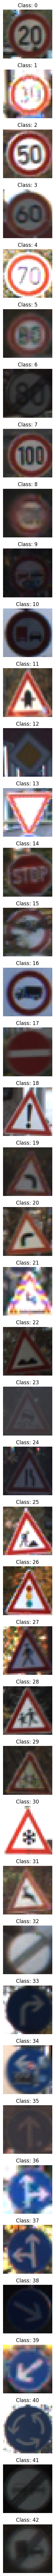

In [50]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
# Assuming 'features' and 'labels' are already defined from the previous code
# Create a dictionary to store sample images for each class
class_samples = {}
# Iterate through the data and store one sample image per class
for i in range(len(labels)):
  label = labels[i]
  if label not in class_samples:
    class_samples[label] = data[i]
# Plot the sample images
fig, axes = plt.subplots(nrows=len(class_samples), ncols=1, figsize=(5, 2 * len(class_samples)))
for i, (label, image_data) in enumerate(class_samples.items()):
    image = image_data.reshape(30, 30, 3).astype(np.uint8) # Reshape to 30x30 RGB
    axes[i].imshow(image)
    axes[i].set_title(f"Class: {label}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


In [51]:
data[11]

array([128, 132, 135, ...,  60,  52,  42], dtype=uint8)

In [52]:
data[100]

array([203, 185, 191, ...,  48,  45,  43], dtype=uint8)

#### Plot the distribution of Classes

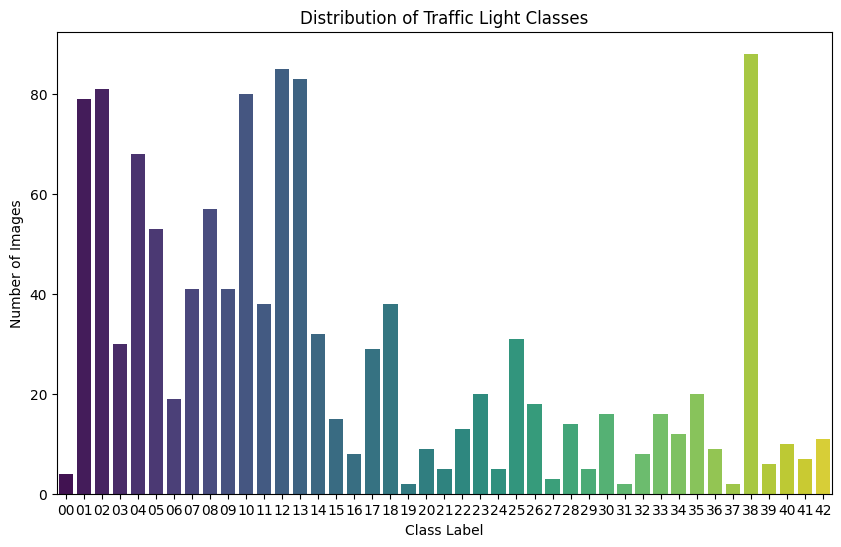

In [53]:
import seaborn as sns
df= pd.DataFrame(distribution_of_classes, index=[0])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, palette='viridis')
plt.title('Distribution of Traffic Light Classes')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()
#sns.countplot(data=df, x='class_label', palette='viridis')
#plt.title('Distribution of Traffic Light Classes')
#plt.xlabel('Class Label')
#plt.ylabel('Number of Images')
#plt.show()

In [54]:
df

,00,01,02,03,04,05,06,07,08,09,...,33,34,35,36,37,38,39,40,41,42
0,4,79,81,30,68,53,19,41,57,41,...,16,12,20,9,2,88,6,10,7,11


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [72]:
# YOUR CODE HERE
#data = np.array(data)
data = preprocessing.normalize(data)


In [73]:
data

array([[0.01986551, 0.02072923, 0.01576285, ..., 0.02763897, 0.03929916,
        0.04145846],
       [0.02543697, 0.0255443 , 0.02651026, ..., 0.02736889, 0.02736889,
        0.02651026],
       [0.02848488, 0.02062096, 0.01765014, ..., 0.02324227, 0.01240753,
        0.00856294],
       ...,
       [0.00675243, 0.00604165, 0.00533087, ..., 0.01137251, 0.00995095,
        0.00817399],
       [0.01369335, 0.01250262, 0.01547944, ..., 0.02143307, 0.01786089,
        0.01726553],
       [0.00826173, 0.00826173, 0.0123926 , ..., 0.00908791, 0.00908791,
        0.0123926 ]])

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [74]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 2700)
(243, 2700)
(970,)
(243,)


In [76]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [78]:
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp.fit(X_train, y_train)

# Evaluate the best model on the test set

y_pred = mlp.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))


Test set accuracy: 0.8518518518518519


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.79      0.94      0.86        16
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00        15
           5       0.79      0.79      0.79        14
           6       1.00      0.83      0.91         6
           7       0.70      0.78      0.74         9
           8       0.91      0.71      0.80        14
           9       0.92      1.00      0.96        11
          10       0.94      0.94      0.94        16
          11       0.92      1.00      0.96        12
          12       1.00      0.89      0.94        18
          13       0.94      1.00      0.97        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         4
          18       0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [82]:
# YOUR CODE HERE

# Define the parameter grid to explore
param_grid = {
    'hidden_layer_sizes': [(100, 50)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant'],
    'max_iter': [50]
}


mlp = MLPClassifier(random_state=42)


grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy on the training data
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd'}
Best cross-validation accuracy: 0.07010536508300526
Test set accuracy: 0.06172839506172839
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        18
          13       0.06      1.00      0.12      

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

#### Try the different algorithms and compare the results with MLP classifier

In [84]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Initialize different classifiers
classifiers = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNeighbors": KNeighborsClassifier()
}
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "report": report}
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{report}")
# Compare results (Example: Print accuracies)
print("\nComparison of Accuracies:")
for name, result in results.items():
  print(f"{name}: {result['accuracy']}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForest Accuracy: 0.8271604938271605
RandomForest Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.73      1.00      0.84        16
           3       1.00      0.83      0.91         6
           4       0.80      0.80      0.80        15
           5       0.70      0.50      0.58        14
           6       0.83      0.83      0.83         6
           7       0.86      0.67      0.75         9
           8       0.73      0.79      0.76        14
           9       0.92      1.00      0.96        11
          10       0.80      1.00      0.89        16
          11       0.92      1.00      0.96        12
          12       0.94      0.94      0.94        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Accuracy: 0.7119341563786008
SVC Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.75      0.67        16
           2       0.48      0.81      0.60        16
           3       1.00      0.33      0.50         6
           4       0.85      0.73      0.79        15
           5       0.47      0.50      0.48        14
           6       0.57      0.67      0.62         6
           7       1.00      0.67      0.80         9
           8       0.64      0.64      0.64        14
           9       0.90      0.82      0.86        11
          10       0.85      0.69      0.76        16
          11       1.00      0.83      0.91        12
          12       0.90      1.00      0.95        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
          17       1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [62]:
print(tf.__version__)

2.17.1


In [63]:
# Step 1 - Build the architecture
# YOUR CODE HERE

In [64]:
# Step 2 - Compile the model
# YOUR CODE HERE

In [65]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE

In [89]:
# Define the keras model and initialize the layers
# Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
# Build the architecture
# Define the keras model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=data.shape[1])) # Input layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu')) # Hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(labels)), activation='softmax')) # Output layer (number of classes)
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy since labels are integers
              optimizer='adam',
              metrics=['accuracy'])
# Fit and evaluate the model
#model.fit(X_train, np.unique(labels, return_inverse=True)[1][np.isin(labels, np.unique(labels))][np.where(np.isin(labels, np.unique(labels)))[0][np.isin(np.where(np.isin(labels,np.unique(labels)))[0],np.where(y_train==y_train)[0])]], epochs=10, batch_size=32, validation_split=0.1)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
#loss, accuracy = model.evaluate(X_test, np.unique(labels, return_inverse=True)[1][np.isin(labels, np.unique(labels))][np.where(np.isin(labels, np.unique(labels)))[0][np.isin(np.where(np.isin(labels,np.unique(labels)))[0],np.where(y_test==y_test)[0])]])
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0905 - loss: 4.1004 - val_accuracy: 0.1856 - val_loss: 3.6872
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2822 - loss: 2.8524 - val_accuracy: 0.2371 - val_loss: 3.6044
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4215 - loss: 2.3285 - val_accuracy: 0.2268 - val_loss: 3.5235
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4943 - loss: 1.9187 - val_accuracy: 0.2474 - val_loss: 3.4205
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5298 - loss: 1.7768 - val_accuracy: 0.2062 - val_loss: 3.3438
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6137 - loss: 1.5242 - val_accuracy: 0.2268 - val_loss: 3.2354
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6777 - loss: 1.3416 - val_accuracy: 0.3299 - val_loss: 3.0993
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6719 - loss: 1.3039 - val_accuracy: 0.3196 - va

In [88]:
data.shape[1]

np.unique(labels, return_inverse=True)[1][np.isin(labels, np.unique(labels))][np.where(np.isin(labels, np.unique(labels)))[0][np.isin(np.where(np.isin(labels,np.unique(labels)))[0],np.where(y_train==y_train)[0])]]

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

#### Try the same parameters used for MLP Classifier and build the keras model

In [92]:
# YOUR CODE HERE
# Try the same parameters used for MLP Classifier and build the keras model
# Define the keras model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=data.shape[1])) # Input layer - 100 neurons
#model.add(Dense(100, activation='relu')) # Hidden layer - 50 neurons
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(labels)), activation='softmax')) # Output layer (number of classes)
# Compile the model using 'adam' solver
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Fit and evaluate the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1) # 500 epochs
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0220 - loss: 3.7613 - val_accuracy: 0.0722 - val_loss: 3.7534
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0744 - loss: 3.7490 - val_accuracy: 0.0619 - val_loss: 3.7438
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0734 - loss: 3.7401 - val_accuracy: 0.0619 - val_loss: 3.7350
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0767 - loss: 3.7285 - val_accuracy: 0.0619 - val_loss: 3.7270
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0707 - loss: 3.7226 - val_accuracy: 0.0619 - val_loss: 3.7191
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0619 - loss: 3.7094 - val_accuracy: 0.0619 - val_loss: 3.7114
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0838 - loss: 3.6995 - val_accuracy: 0.0619 - val_loss: 3.7035
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0674 - loss: 3.6895 - val_accuracy: 0.0619 - val

#### Experiment using Dropout, Regularization and Batch Normalization

In [93]:
# YOUR CODE HERE
### We have already covered the Dropout & Batch normalization in the above code

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.